### Slot 1

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
def draw_quadrangle(X, Y, color = 'b', limX = [-50, 50], limY = [-50, 50]):
    '''
    Vẽ hình tứ giác.

    Parameters:
    - X (list): Tọa độ trên trục x của các điểm ảnh của hình.
    - Y (list): Tọa độ trên trục y của các điểm ảnh của hình.
    - color (str): Màu sắc của hình (mặc định là 'b' - màu xanh dương).
    - limX (list): Giới hạn trục x của hình. Mặc định là [-50, 50].
    - limY (list): Giới hạn trục y của hình. Mặc định là [-50, 50].
    '''
    plt.scatter(X,Y, color = color)
    plt.xlim(limX)
    plt.ylim(limY)

In [ ]:
def transform(X, Y, T = np.eye(3), p = False):
    '''
    Biểu diễn biến đổi.

    Input:
    - (X, Y): Vị trí của điểm ảnh trong hình cần được biến đổi.
    - T: Ma trận biến đổi.
    - p (bool): Chế độ biểu diễn, mặc định là False. Nếu là True, đây là chế độ điểm ảnh.

    Lưu ý: Vị trí điểm ảnh chỉ được phép là số nguyên dương.

    Output:
    homogeneous_coordinates: được tạo ra từ tọa độ không đồng nhất.
    (new_X, new_Y): là các tọa độ đã được biến đổi.
    '''
    row_ones = np.ones(len(X))
    homogeneous_coordinates = np.concatenate(([X], [Y], [row_ones]), axis = 0)
    new_coordinates = T @ homogeneous_coordinates
    new_X = new_coordinates[0, :]/new_coordinates[2, :]
    new_Y = new_coordinates[1, :]/new_coordinates[2, :]
    if(p):
        return new_X.astype('int32'), new_Y.astype('int32')
    else:
        return new_X, new_Y


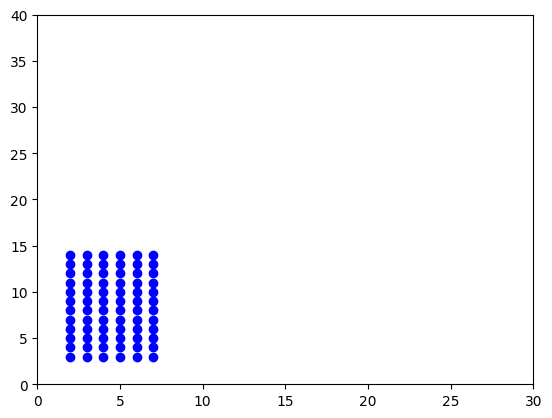

In [ ]:
f1, f2 = np.meshgrid(np.arange(2,8), np.arange(3,15))  # Tạo ra một lưới các điểm ảnh
X = f1.flatten()  # Biến đổi ma trận f1 thành một mảng 1 chiều
Y = f2.flatten()  # Biến đổi ma trận f2 thành một mảng 1 chiều
draw_quadrangle(X, Y, limX = [0, 30], limY = [0, 40])  # Vẽ hình tứ giác dựa trên các tọa độ X và Y

### Slot 2

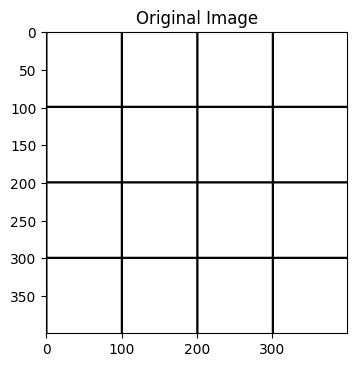

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tạo một hình ảnh trắng
image_size = (400, 400)
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Vẽ hình khối 4x4
for i in range(0, image_size[0], 100):
    cv2.line(image, (i, 0), (i, image_size[1]), (0, 0, 0), 2)
    cv2.line(image, (0, i), (image_size[0], i), (0, 0, 0), 2)

# Hiển thị hình ảnh gốc
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('on')

plt.tight_layout()
plt.show()

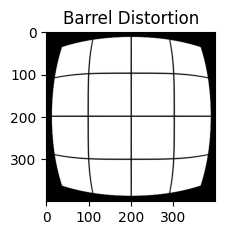

In [ ]:
# Tạo hiệu ứng biến dạng thùng (barrel distortion)
def barrel_distortion(image, k1, k2):
    h, w = image.shape[:2]
    map_x = np.zeros((h, w), dtype=np.float32)
    map_y = np.zeros((h, w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
          #Tính toán tọa độ chuẩn hóa (x,y), Tọa độ  (j,i) được chuyển đổi sang hệ tọa độ chuẩn hóa (−1,1)
            x = (j - w/2) / (w/2)
            y = (i - h/2) / (h/2)

            #Tính khoảng cách r từ tâm:
            r = np.sqrt(x**2 + y**2)

            # Tính tọa độ biến dạng (xdistorted,ydistorted))
            x_distorted = x * (1 + k1 * r**2 + k2 * r**4)
            y_distorted = y * (1 + k1 * r**2 + k2 * r**4)

            #Chuyển đổi tọa độ biến dạng trở lại hệ tọa độ thực
            map_x[i, j] = (x_distorted * (w/2)) + w/2
            map_y[i, j] = (y_distorted * (h/2)) + h/2

    distorted_image = cv2.remap(image, map_x, map_y, cv2.INTER_LINEAR)
    return distorted_image

# Áp dụng biến dạng thùng
barrel_distorted_image = barrel_distortion(image, k1=-0.1, k2=0.2)

# Hiển thị hình ảnh biến dạng thùng
plt.subplot(1, 3, 2)
plt.title("Barrel Distortion")
plt.imshow(barrel_distorted_image)
plt.axis('on')

plt.tight_layout()
plt.show()

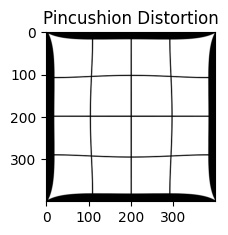

In [ ]:
# Tạo hiệu ứng biến dạng gối (pincushion distortion)
def pincushion_distortion(image, k1, k2):
    h, w = image.shape[:2]
    map_x = np.zeros((h, w), dtype=np.float32)
    map_y = np.zeros((h, w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            x = (j - w/2) / (w/2)
            y = (i - h/2) / (h/2)
            r = np.sqrt(x**2 + y**2)
            x_distorted = x * (1 + k1 * r**2 + k2 * r**4)
            y_distorted = y * (1 + k1 * r**2 + k2 * r**4)
            map_x[i, j] = (x_distorted * (w/2)) + w/2
            map_y[i, j] = (y_distorted * (h/2)) + h/2

    distorted_image = cv2.remap(image, map_x, map_y, cv2.INTER_LINEAR)
    return distorted_image

# Áp dụng biến dạng gối
pincushion_distorted_image = pincushion_distortion(image, k1=0.2, k2=-0.1)

# Hiển thị hình ảnh biến dạng gối
plt.subplot(1, 3, 3)
plt.title("Pincushion Distortion")
plt.imshow(pincushion_distorted_image)
plt.axis('on')

plt.tight_layout()
plt.show()

### Slot 3

In [ ]:
!pip install opencv-python-headless numpy

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tạo một hình ảnh trắng
width, height = 500, 500
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Vẽ vòng tròn đường kính 3cm (giả sử 1cm = 100 pixel)
center = (width // 2, height // 2)
radius = 150  # 3cm = 300 pixel / 2
color = np.array([0, 165, 255], dtype=np.float32)  # Màu cam trong BGR, chuyển thành mảng NumPy

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
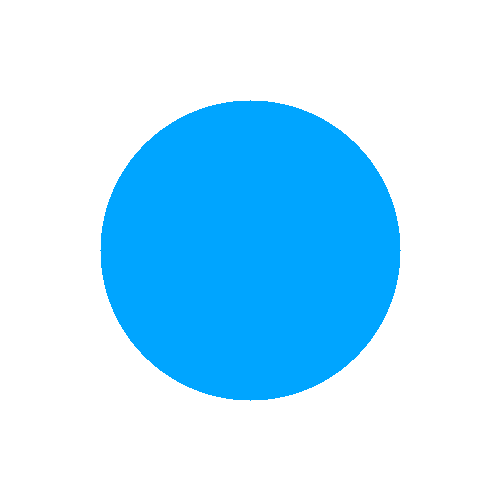

In [ ]:
# Chuyển đổi color thành tuple chứa các giá trị số nguyên
color_tuple = tuple(map(int, color))  # Chuyển đổi mảng NumPy thành tuple (0, 165, 255)
cv2.circle(image, center, radius, color_tuple, -1)

In [ ]:
# Hàm tính toán Phong reflection model
def phong_shading(image, center, radius, light_source, viewer_position, ka, kd, ks, shininess):
    height, width, _ = image.shape
    shaded_image = np.zeros_like(image, dtype=np.float32)
    ambient_image = np.zeros_like(image, dtype=np.float32)
    diffuse_image = np.zeros_like(image, dtype=np.float32)
    specular_image = np.zeros_like(image, dtype=np.float32)

    for y in range(height):
        for x in range(width):
            dx = x - center[0]
            dy = y - center[1]
            distance = np.sqrt(dx**2 + dy**2)

            if distance <= radius:
                # Tính vector pháp tuyến (normal vector)
                nx = dx / radius
                ny = dy / radius
                nz = np.sqrt(1 - nx**2 - ny**2)
                normal = np.array([nx, ny, nz])

                # Tính vector ánh sáng (light vector)
                lx, ly, lz = light_source
                light_dir = np.array([lx, ly, lz])
                light_dir = light_dir / np.linalg.norm(light_dir)

                # Tính vector view (viewer vector)
                vx, vy, vz = viewer_position
                view_dir = np.array([vx, vy, vz])
                view_dir = view_dir / np.linalg.norm(view_dir)

                # Tính vector phản xạ (reflect vector)
                reflect_dir = 2 * np.dot(normal, light_dir) * normal - light_dir
                reflect_dir = reflect_dir / np.linalg.norm(reflect_dir)

                # Ambient component
                ambient = ka * color
                ambient_image[y, x] = np.clip(ambient, 0, 255)

                # Diffuse component
                diffuse_intensity = max(0, np.dot(normal, light_dir))
                diffuse = kd * diffuse_intensity * color
                diffuse_image[y, x] = np.clip(diffuse, 0, 255)

                # Specular component
                specular_intensity = max(0, np.dot(reflect_dir, view_dir)) ** shininess
                specular = ks * specular_intensity * np.array([255, 255, 255], dtype=np.float32)  # White highlight
                specular_image[y, x] = np.clip(specular, 0, 255)

                # Kết hợp các thành phần
                shaded_color = ambient + diffuse + specular
                shaded_image[y, x] = np.clip(shaded_color, 0, 255)

    return (
        ambient_image.astype(np.uint8),
        diffuse_image.astype(np.uint8),
        specular_image.astype(np.uint8),
        shaded_image.astype(np.uint8)
    )

In [ ]:
# Định nghĩa các tham số
light_source = (-1, -1, 1) # nguồn từ trên bên trái
viewer_position = (0, 0, 1) # điểm nhìn từ phía người xem
ka = 0.1 # hệ số ambient
kd = 0.7 # hệ số difuse
ks = 0.2 # hệ số speccular
shininess = 50 # độ bóng

In [ ]:
# Áp dụng shading
ambient_image, diffuse_image, specular_image, shaded_image = phong_shading(image, center, radius, light_source, viewer_position, ka, kd, ks, shininess)

<ipython-input-12-68090c0beb08>:19: RuntimeWarning: invalid value encountered in sqrt
  nz = np.sqrt(1 - nx**2 - ny**2)


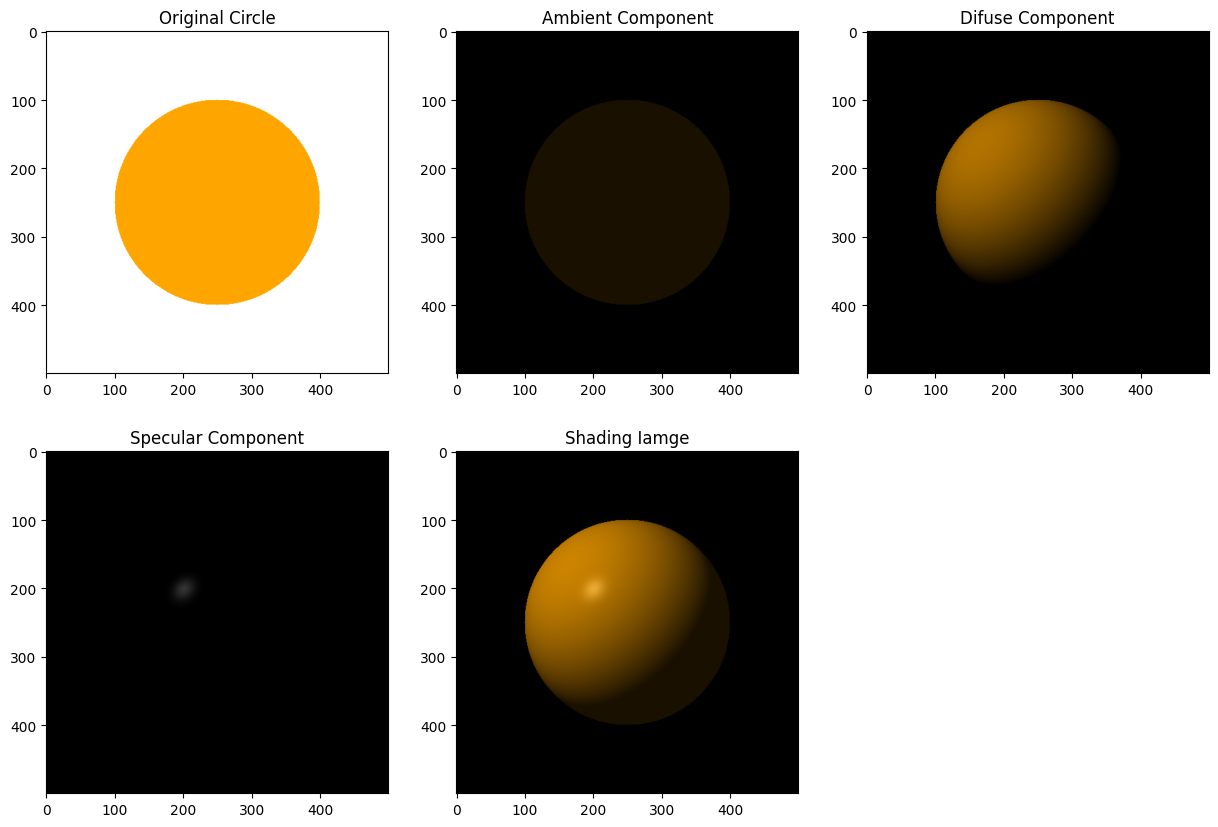

In [ ]:
# hiển thị kết quả
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Circle")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title("Ambient Component")
plt.imshow(cv2.cvtColor(ambient_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 3)
plt.title("Difuse Component")
plt.imshow(cv2.cvtColor(diffuse_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title("Specular Component")
plt.imshow(cv2.cvtColor(specular_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 5)
plt.title("Shading Iamge")
plt.imshow(cv2.cvtColor(shaded_image, cv2.COLOR_BGR2RGB))

plt.show()


### Drawing Flower

In [2]:
!pip install opencv-python-headless numpy

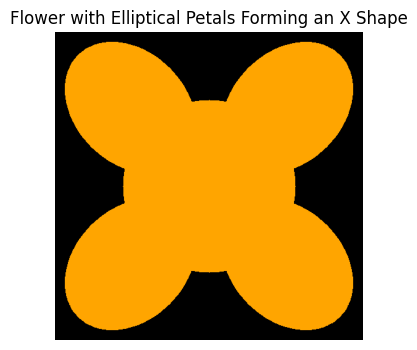

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a black canvas
width, height = 500, 500
image = np.zeros((height, width, 3), dtype=np.uint8)  # Black background

# Center of the flower and stamen properties
center = (width // 2, height // 2)
stamen_color = (0, 165, 255)  # Orange color for the stamen
stamen_radius = 140  # Radius of the stamen

# Radius of the invisible circle and petal properties
circle_radius = 180  # Radius of the circle defining petal centers
petal_size = (120, 90)  # (Major axis, Minor axis) of each ellipse
petal_color = (0, 165, 255)  # Dark purple (BGR)

# Define the 4 positions for the centers of the petals
angles = [45, 135, 225, 315]  # Angles (degrees) for the 4 corners of the circle
for angle in angles:
    # Compute the center of each petal
    petal_center = (
        int(center[0] + circle_radius * np.cos(np.radians(angle))),
        int(center[1] + circle_radius * np.sin(np.radians(angle)))
    )
    # Draw the petal as an ellipse
    cv2.ellipse(image, petal_center, petal_size, angle, 0, 360, petal_color, -1)

# Draw the stamen in the center
cv2.circle(image, center, stamen_radius, stamen_color, -1)

# Display the result
plt.figure(figsize=(4, 4))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Flower with Elliptical Petals Forming an X Shape")
plt.show()


In [74]:
def phong_shading(image, center, petal_radius, light_source, viewer_position, ka, kd, ks, shininess):
    height, width, _ = image.shape
    shaded_image = np.zeros_like(image, dtype=np.float32)
    ambient_image = np.zeros_like(image, dtype=np.float32)
    diffuse_image = np.zeros_like(image, dtype=np.float32)
    specular_image = np.zeros_like(image, dtype=np.float32)

    for y in range(height):
        for x in range(width):
            dx = x - center[0]
            dy = y - center[1]
            distance = np.sqrt(dx**2 + dy**2)

            # Only calculate shading for pixels inside the flower shape (petal)
            if distance <= petal_radius:
                # Tính vector pháp tuyến (normal vector)
                nx = dx / petal_radius
                ny = dy / petal_radius
                nz = np.sqrt(1 - nx**2 - ny**2)
                normal = np.array([nx, ny, nz])

                # Tính vector ánh sáng (light vector)
                lx, ly, lz = light_source
                light_dir = np.array([lx, ly, lz])
                light_dir = light_dir / np.linalg.norm(light_dir)

                # Tính vector view (viewer vector)
                vx, vy, vz = viewer_position
                view_dir = np.array([vx, vy, vz])
                view_dir = view_dir / np.linalg.norm(view_dir)

                # Tính vector phản xạ (reflect vector)
                reflect_dir = 2 * np.dot(normal, light_dir) * normal - light_dir
                reflect_dir = reflect_dir / np.linalg.norm(reflect_dir)

                # Ambient component
                ambient = ka * image[y, x]
                ambient_image[y, x] = np.clip(ambient, 0, 255)

                # Diffuse component
                diffuse_intensity = max(0, np.dot(normal, light_dir))
                diffuse = kd * diffuse_intensity * image[y, x]
                diffuse_image[y, x] = np.clip(diffuse, 0, 255)

                # Specular component
                specular_intensity = max(0, np.dot(reflect_dir, view_dir)) ** shininess
                specular = ks * specular_intensity * np.array([255, 255, 255], dtype=np.float32)  # White highlight
                specular_image[y, x] = np.clip(specular, 0, 255)

                # Kết hợp các thành phần
                shaded_color = ambient + diffuse + specular
                shaded_image[y, x] = np.clip(shaded_color, 0, 255)
            else:
                # For pixels outside the flower, keep them unchanged
                ambient_image[y, x] = image[y, x]
                diffuse_image[y, x] = image[y, x]
                specular_image[y, x] = image[y, x]
                shaded_image[y, x] = image[y, x]

    return (
        ambient_image.astype(np.uint8),
        diffuse_image.astype(np.uint8),
        specular_image.astype(np.uint8),
        shaded_image.astype(np.uint8)
    )


In [88]:
# Định nghĩa các tham số
light_source = (-1, -1, 1) # nguồn từ trên bên trái
viewer_position = (0, 0, 1) # điểm nhìn từ phía người xem
ka = 0.3 # hệ số ambient
kd = 0.8 # hệ số difuse
ks = 0.2 # hệ số speccular
shininess = 50 # độ bóng

# Áp dụng shading
ambient_image, diffuse_image, specular_image, shaded_image = phong_shading(image, center, 300, light_source, viewer_position, ka, kd, ks, shininess)

<ipython-input-74-e3a03785f5f8>:19: RuntimeWarning: invalid value encountered in sqrt
  nz = np.sqrt(1 - nx**2 - ny**2)


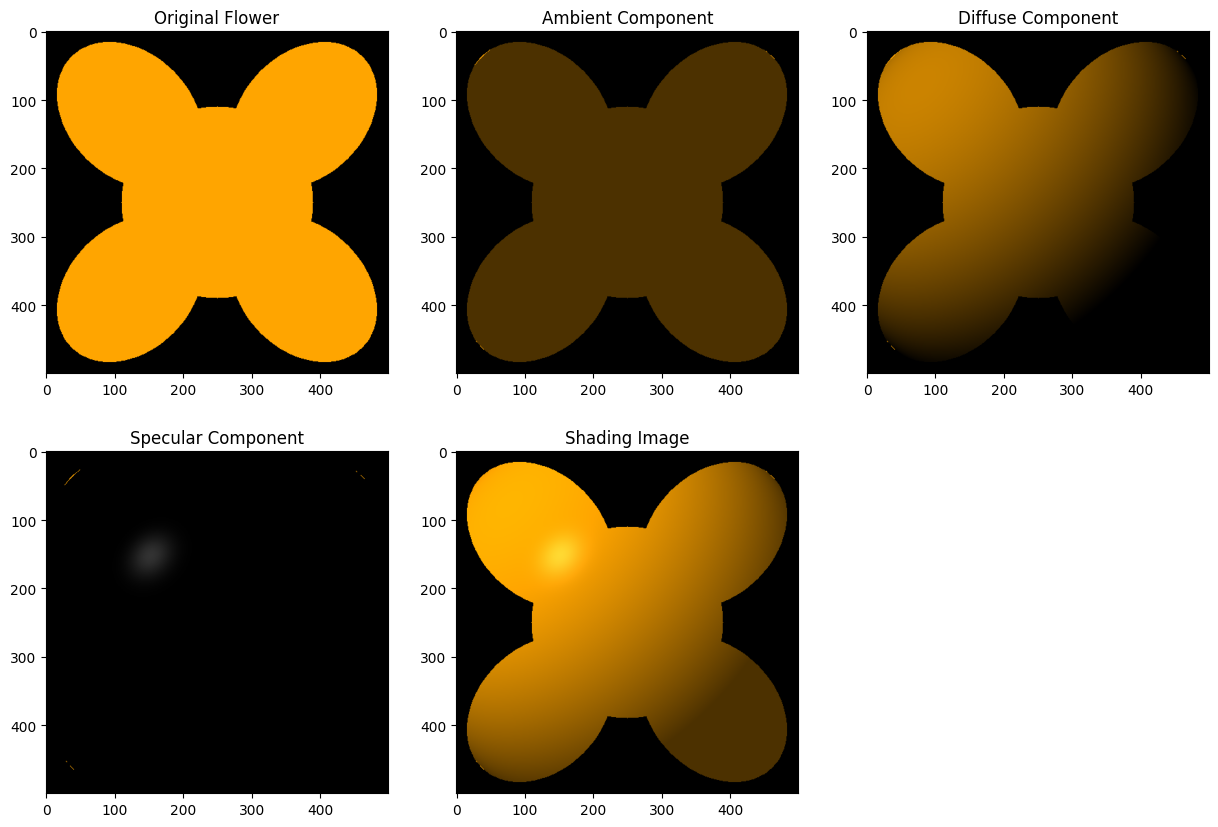

In [89]:
# hiển thị kết quả
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Flower")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title("Ambient Component")
plt.imshow(cv2.cvtColor(ambient_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 3)
plt.title("Diffuse Component")
plt.imshow(cv2.cvtColor(diffuse_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title("Specular Component")
plt.imshow(cv2.cvtColor(specular_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 5)
plt.title("Shading Image")
plt.imshow(cv2.cvtColor(shaded_image, cv2.COLOR_BGR2RGB))

plt.show()
